# Vacancy Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Technology Stack Analysis

### Task:
- Analyze the technology stacks mentioned in job listings to identify commonly required skills.
- Determine the frequency of specific technologies (e.g., SQL, Django, Docker) to understand their popularity among employers.

In [2]:
vacancy_df = pd.read_csv("csv_data/python.csv")
vacancy_df = vacancy_df.dropna()

vacancy_df.head()

,title,location,stack,url
0,Backend Software Engineer (Python) — Relocatio...,"за кордоном, віддалено","['SQL', 'Django', 'Docker', 'Ansible', 'TeamCi...",https://jobs.dou.ua/companies/revolut/vacancie...
1,Senior Software Engineer (Python),віддалено,"['SQL', 'FastAPI', 'Kubernetes', 'AsyncIO']",https://jobs.dou.ua/companies/competera/vacanc...
2,Senior Python Developer,"Київ, Дніпро, Запоріжжя, віддалено","['Ansible', 'Git', 'CI/CD', 'SOLID']",https://jobs.dou.ua/companies/the-gravity-agen...
3,Experienced React and python developer,віддалено,"['SQL', 'Docker', 'Git', 'Requests', 'REST']",https://jobs.dou.ua/companies/windsor-ai/vacan...
4,Fullstack Python/React Developer,Запоріжжя,"['SQL', 'Django', 'Flask', 'FastAPI', 'MongoDB...",https://jobs.dou.ua/companies/elementica/vacan...


In [3]:
def get_technology_count_df(df: pd.DataFrame) -> pd.DataFrame:
    stack_series = df["stack"]
    
    stack_df = pd.DataFrame(stack_series.str.strip("['']").str.split("', '").explode())
    
    technology_counts = stack_df.value_counts()
    technology_counts = technology_counts.reset_index().set_index("stack")
    
    return technology_counts

In [4]:
technology_counts = get_technology_count_df(vacancy_df)
technology_counts.head()

,count
stack,
SQL,68
REST,52
Git,45
Docker,43
Django,41


In [5]:
def create_bar_chart(
        data: pd.Series,
        xlabel: str,
        ylabel: str,
        title: str,
        save: bool = False,
        filename: str = "chart"
) -> None:
    data = data.sort_values(by="count")
    data.plot(kind="barh", figsize=(10, 8))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.margins(y=0.9)
    plt.xticks()
    plt.tight_layout()
    
    if save:
        plt.savefig(f"{datetime.now().date()}-{filename}-analysis.jpg")
    
    plt.show()

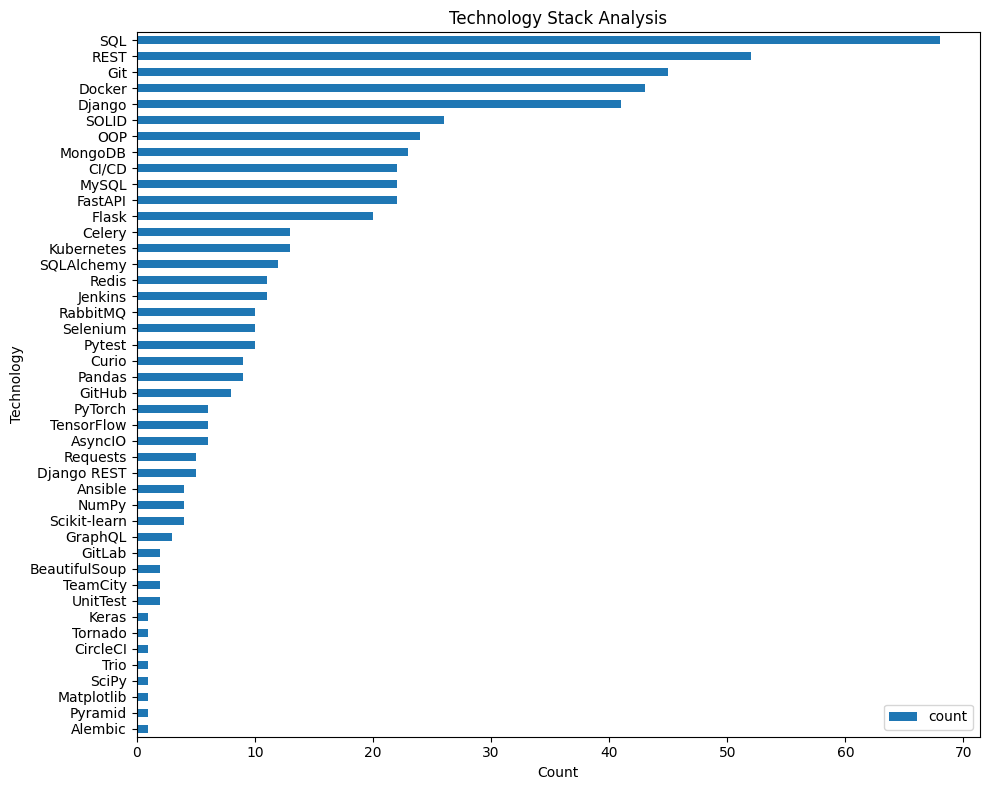

In [6]:
technology_analysis_labels = {
    "xlabel": "Count",
    "ylabel": "Technology",
    "title": "Technology Stack Analysis"
}
create_bar_chart(
    technology_counts,
    **technology_analysis_labels,
    save=True,
    filename="stack"
)

### Location Analysis

#### Task:
- Count the number of job listings by location.
- Visualize the distribution of job listings on a chart.
- Analyze the popularity of different locations for job opportunities.

In [7]:
def shorten_location(df: pd.DataFrame) -> pd.DataFrame:
    location_series = df["location"]
    
    location_df = pd.DataFrame(location_series.str.split(", ").explode())
    
    length = 25
    shortened = pd.Series(
        label[:length] + "..."
        if len(label) > length else label
        for label in location_df["location"]
    )
    location_df["location"] = shortened
    
    return location_df

In [8]:
location_df = shorten_location(vacancy_df)
location_df.head()

,location
0,за кордоном
0,за кордоном
1,віддалено
2,віддалено
2,віддалено


In [9]:
location_counts = location_df.value_counts()
location_counts = location_counts.reset_index().set_index("location")

location_counts.head()

,count
location,
віддалено,100
Київ,29
Львів,17
Дніпро,10
Кишинів (Молдова),10


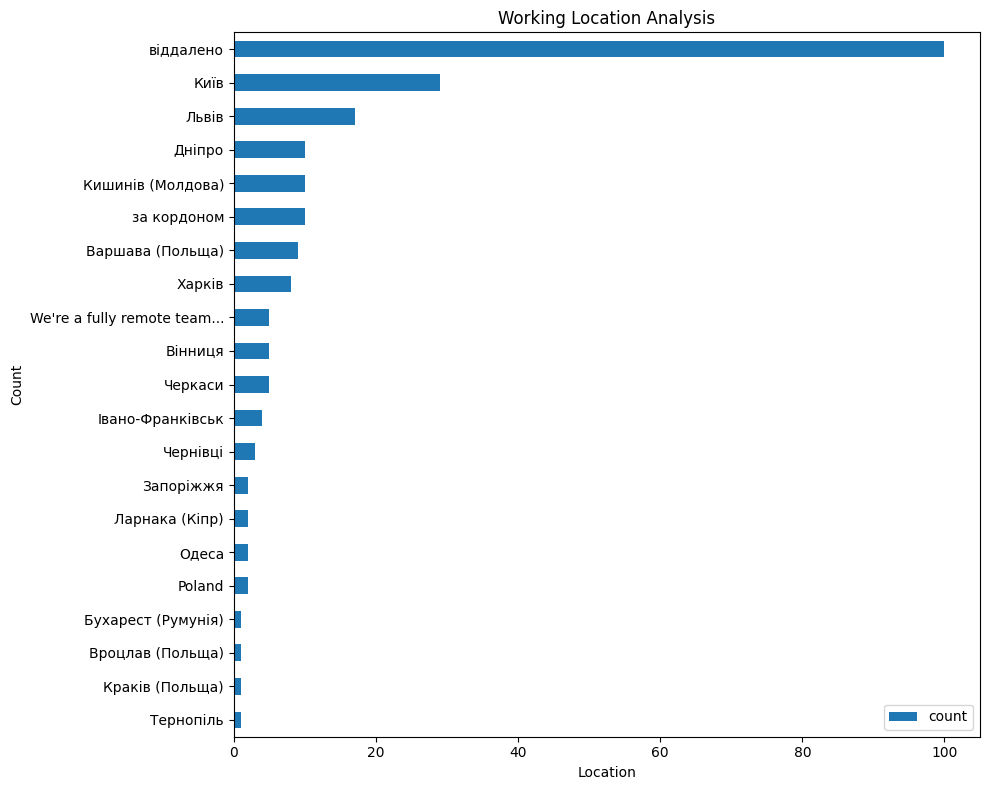

In [10]:
create_bar_chart(
    location_counts,
    "Location",
    "Count",
    "Working Location Analysis",
    save=True,
    filename="location"
)

### Experience-Technology Relation Analysis

In [11]:
vacancy_1y_df = pd.read_csv("csv_data/python_0-1.csv")
vacancy_1y_df = vacancy_1y_df.dropna()

vacancy_5y_df = pd.read_csv("csv_data/python_5+.csv")
vacancy_5y_df = vacancy_5y_df.dropna()

vacancy_5y_df.head()

,title,location,stack,url
0,Backend Software Engineer (Python) — Relocatio...,"за кордоном, віддалено","['SQL', 'Django', 'Docker', 'Ansible', 'TeamCi...",https://jobs.dou.ua/companies/revolut/vacancie...
1,Senior Software Engineer (Python),віддалено,"['SQL', 'FastAPI', 'Kubernetes', 'AsyncIO']",https://jobs.dou.ua/companies/competera/vacanc...
2,Senior Python Developer,"Кропивницький, віддалено","['SQL', 'Django', 'Flask', 'SQLAlchemy', 'Cele...",https://jobs.dou.ua/companies/onix/vacancies/2...
3,Senior Python Software Engineer (240002UQ),"Київ, Львів, Дніпро, Вінниця, віддалено","['SQL', 'Docker', 'Git', 'GitLab', 'REST']",https://jobs.dou.ua/companies/ciklum/vacancies...
4,Python Developer,за кордоном,"['SQL', 'FastAPI', 'Tornado', 'SQLAlchemy', 'C...",https://jobs.dou.ua/companies/infingame/vacanc...


In [12]:
technology_counts_1y = get_technology_count_df(vacancy_1y_df)
technology_counts_5y = get_technology_count_df(vacancy_5y_df)

technology_counts_5y.head()

,count
stack,
SQL,24
REST,20
Git,19
SOLID,17
Docker,17


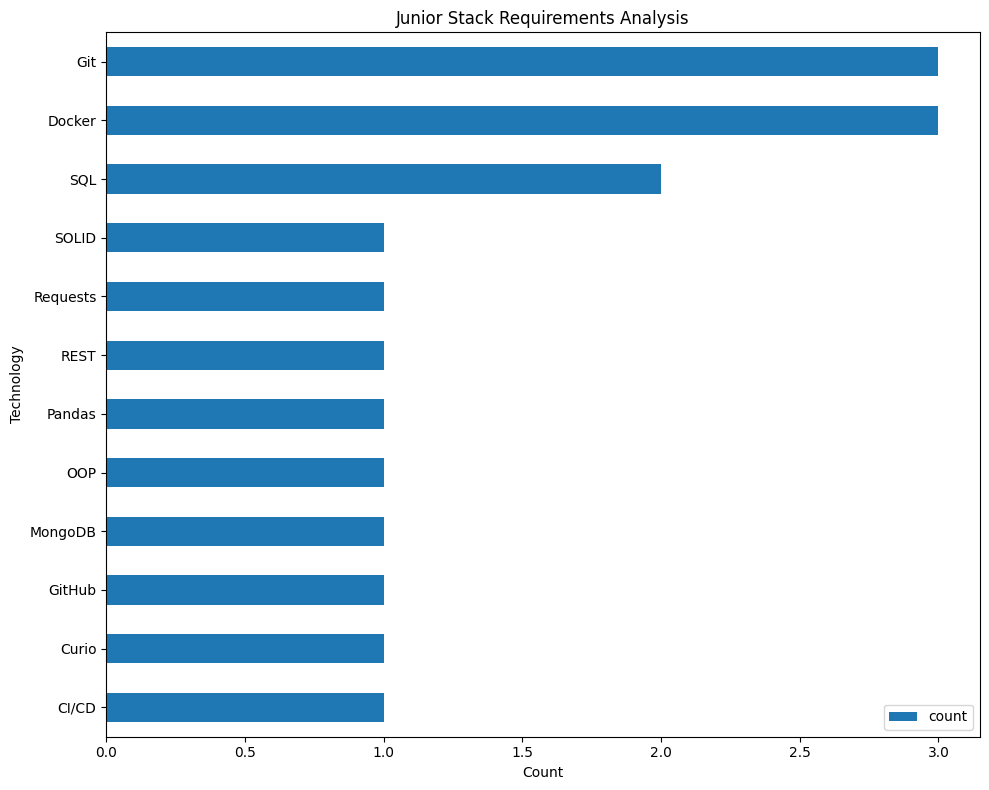

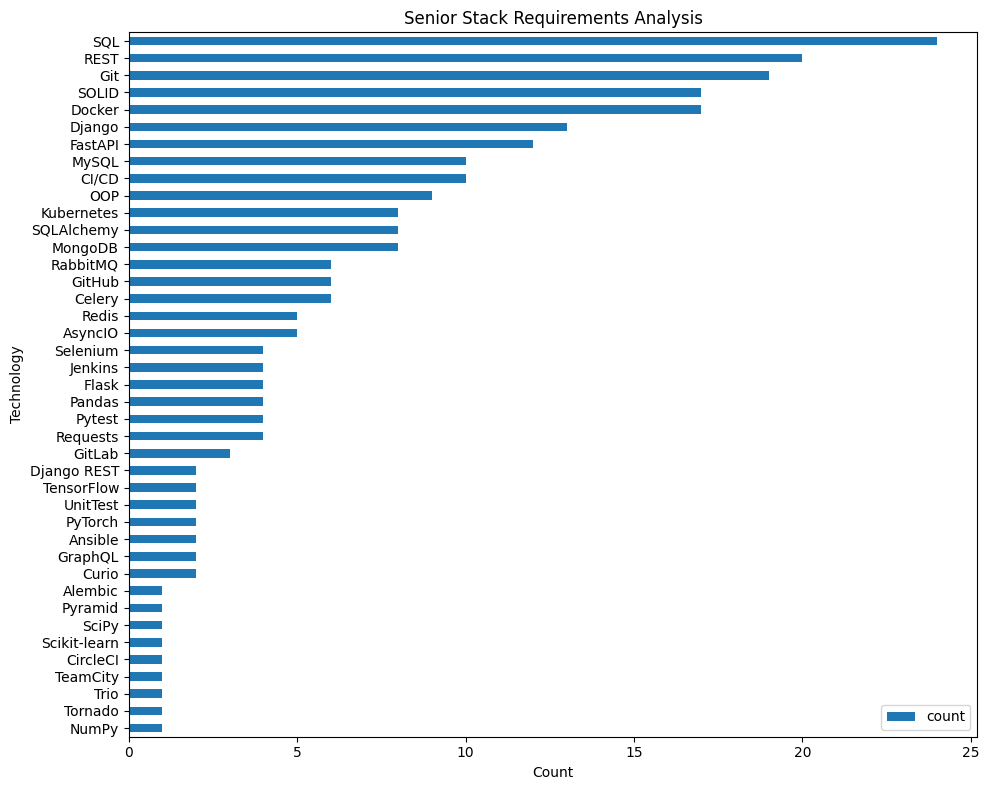

In [13]:
technology_1y_chart = create_bar_chart(
    technology_counts_1y,
    xlabel=technology_analysis_labels["xlabel"],
    ylabel=technology_analysis_labels["ylabel"],
    title="Junior Stack Requirements Analysis",
    save=True,
    filename="junior-stack"
)
technology_5y_chart = create_bar_chart(
    technology_counts_5y,
    xlabel=technology_analysis_labels["xlabel"],
    ylabel=technology_analysis_labels["ylabel"],
    title="Senior Stack Requirements Analysis",
    save=True,
    filename="senior-stack"
)